In [1]:
import pandas as pd
import dotenv

In [2]:
# load .env file
dotenv.load_dotenv()

False

In [3]:
with open('data/textfile_large.txt', 'r', encoding='ISO-8859-2') as file:
    content = file.read()
    print(content[:100])

ingatlan.com logo
CSOK Plusz
Hitelintéző
Ingatlanoskereső
Bejelentkezés/Regisztráció
Budapest IX. ke


In [4]:
# Splitting the content based on the separator '------------\n'
entries = content.split('------------\n')

# Finding the unique entries
unique_entries = list(set(entries))

In [5]:
print(unique_entries[0][-1300:])

ngatlan.com
Magánszemély
A hirdető nem adott meg telefonszámot.
Hirdetés
Hirdetés
Hirdetés
Hasznos tippek, tanácsok ingatlanvásárláshoz
Az ingatlanvásárlás menete
chevron_right
Így zajlik a lakásbérlés
chevron_right
Otthonteremtési támogatások és feltételeik 2024
chevron_right
Ingatlanvásárlás hitelből, stresszmentesen online előminősítéssel
chevron_right
Összes hasznos tipp/tanács

Főoldal
Budapest XIII. kerület
Újlipótváros
Eladó lakások - Újlipótváros
Magánszemélyeknek
Hirdetés feladása
Árak és hirdetési lehetőségek
Fizetési lehetőségek
Hirdetőtábla

Ingatlanoskereső
Lakáshitel-kalkulátor
Energetikai tanúsítvány
Alaprajztervező
Közvetítőknek
Belépés közvetítőknek
Árak és hirdetési lehetőségek
Fizetési lehetőségek
Regisztráció közvetítőknek
Kiemelt ajánlat hitelközvetítőknek
Ingatlanpiaci adatok
Csapatunk
Rólunk
Kik vagyunk
Állások
Kapcsolat
+36 1 237 2065
segitunk@ingatlan.com
munkanapokon 10:00-17:00-ig
Összes elérhetőségünk
Médiaajánlat
Sajtókapcsolat
United Platforms
Az oldal a U

In [6]:
print(unique_entries[0].split("Hirdetés\n")[0][-50:])

egadva
Parkolás	utca, közterület - fizetős övezet



In [7]:
trimmed_entries = [entry.split("Hirdetés\n")[0] for entry in unique_entries]

<Axes: >

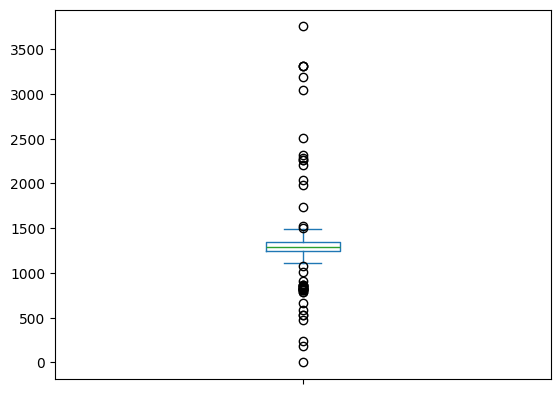

In [8]:
# boxplot of the lengths of the entries
entry_lengths = [len(entry) for entry in trimmed_entries]
pd.Series(entry_lengths).plot(kind='box')

In [9]:
# look at the extremes
pd.Series(entry_lengths).describe()

count    2139.000000
mean     1300.047218
std       156.245268
min         1.000000
25%      1248.000000
50%      1290.000000
75%      1346.500000
max      3755.000000
dtype: float64

In [10]:
max_length_index = entry_lengths.index(max(entry_lengths))
min_length_index = entry_lengths.index(min(entry_lengths))

In [11]:
print(trimmed_entries[max_length_index])


NEW, SUNNY, luxury apartment with a view of the Danube in WATERFRONT CITY residential park FOR SALE!



The property was handed over in the spring of 2023. It is a SE-facing, bright, calm, spacious corner apartment with a panoramic top view, from which you can enjoy a beautiful view of the Danube.



You just have to arrive here!


The parameters of the apartment: the net floor area of the apartment is 90 m2 + 90 m2 terrace, of which 2 m2 is closed storage.

Entering the apartment, we arrive in the hall, from which the living room with an American kitchen and the terrace with a wonderful view open up in front of us. It has two bedrooms, one of which has a direct access to a bathroom with a shower. In addition, a bathroom with a bathtub and 2 separate toilets serve the comfort of the apartment.


The excellently furnished, L-shaped terrace is directly accessible from the living room, dining room, and both rooms.

The apartment includes a 10.62 m2 STORAGE, which is part of the purchase 

In [12]:
print(trimmed_entries[min_length_index])

In [13]:
shortest_entries = sorted(trimmed_entries, key=len)[:10]
print(shortest_entries[0])

In [14]:
print(shortest_entries[1])


???????????????????????????,????????????????!

??????????,???????,???????????

??????????????????????????

?????,????? 82 ???,???????? 108 ????

????????????,?????????

----------------


In [15]:
print(shortest_entries[2])

Két referenciánk a kerületből:
Jász utca 152. /37 lakás, átadva 2018/
Zsinór utca 26-28. /60 lakás, átadva 2021/

Jelenleg futó másik beruházásunk:
XIV. kerület, Róna utca 129. /RÓNA PARK 65 ingatlan/
--------------------------------------


In [16]:
print(shortest_entries[8])


ingatlan.com logo
CSOK Plusz
Hitelintéző
Ingatlanoskereső
Bejelentkezés/Regisztráció
Budapest XVI. kerület, Nefelejcs utca
Eladó csúsztatott zsalus
+17 fotó
Kép az ingatlanról
Kép az ingatlanról
Kép az ingatlanról
Ár
46,90 millió Ft
Alapterület
52 m2
Szobák
2
Azonosító: 34016993
Lépj kapcsolatba a hirdetővel
phone
+36 30 691
ingatlan.com
Magánszemély
share
Megosztás

print
Nyomtatás
visibility_off
Elrejtés
warning
Hiba jelzése
Eladó csúsztatott zsalus
Ingatlan állapota	felújított
Építés éve	1950 és 1980 között
Komfort	összkomfortos
Emelet	4
Épület szintjei	4
Lift	nincs
Belmagasság	nincs megadva
Légkondicionáló	van
Akadálymentesített	nem
Fürdő és wc	külön helyiségben
Tájolás	kelet
Kilátás	nincs megadva
Erkély mérete	3 m2
Kertkapcsolatos	nem
Parkolás	utca, közterület - ingyenes



In [17]:
# remove the 7 shortest entries from unique_entries
unique_entries = [entry for entry in unique_entries if entry not in shortest_entries[:7]]

In [18]:
len(unique_entries)

2133

In [19]:

from langchain.pydantic_v1 import BaseModel, Field
from typing import Optional
from langchain.chat_models.base import init_chat_model

model = "gpt-4o-2024-08-06"
temperature = 0.0

chat_model = init_chat_model(model=model, temperature=temperature)


TypeError: ForwardRef._evaluate() missing 1 required keyword-only argument: 'recursive_guard'

In [63]:
chat_model.invoke("Hello, how are you?")

AIMessage(content="Hello! I'm just a computer program, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 30, 'prompt_tokens': 13, 'total_tokens': 43}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_143bb8492c', 'finish_reason': 'stop', 'logprobs': None}, id='run-ac0a9170-e131-4251-8ec7-bbe16200836d-0', usage_metadata={'input_tokens': 13, 'output_tokens': 30, 'total_tokens': 43})

In [64]:
class ApartmentListing(BaseModel):
    """Model representing an apartment listing with various details."""

    location: str = Field(description="The specific address or area where the property is located.")
    property_type: Optional[str] = Field(description="The type of property being listed, e.g., 'Eladó tégla lakás'.")
    price: float = Field(description="The selling price of the property in Hungarian Forints (Ft).")
    area: float = Field(description="The total area of the apartment in square meters (m²).")
    rooms: Optional[int] = Field(description="The number of rooms in the apartment.")
    condition: Optional[str] = Field(description="The condition of the property, e.g., 'új építésű' (newly built).")
    year_of_construction: Optional[int] = Field(description="The year when the building was or will be completed.")
    comfort: Optional[str] = Field(description="Indicates the comfort level of the apartment, e.g., 'összkomfortos' (fully equipped).")
    floor: Optional[int] = Field(description="The floor level where the apartment is located.")
    building_levels: Optional[int] = Field(description="The total number of floors in the building.")
    description: Optional[str] = Field(description="A 2 sentence summary of the hungarian description of the property.")
    elevator: Optional[bool] = Field(description="Indicates whether the building has an elevator.")
    ceiling_height: Optional[str] = Field(description="The ceiling height of the apartment (if provided)")
    air_conditioning: Optional[bool] = Field(description="Indicates whether the apartment is equipped with air conditioning.")
    accessible: Optional[bool] = Field(description="Indicates whether the apartment is accessible to people with disabilities.")
    balcony_size: Optional[float] = Field(description="The size of the balcony, if present, in square meters (m²).")
    parking: Optional[str] = Field(description="Information about parking availability.")
    parking_price: Optional[str] = Field(description="The price of the parking space in Hungarian Forints (Ft).")
    energy_certificate: Optional[str] = Field(description="Information about the energy efficiency certificate (if provided).")
    avg_gas_consumption: Optional[str] = Field(description="The average gas consumption of the apartment (if provided).")
    avg_electricity_consumption: Optional[str] = Field(description="The average electricity consumption of the apartment (if provided) in kWh/month.")
    maintenance_costs: Optional[float] = Field(description="Information about the maintenance costs of the apartment (if provided) Hungarian Forints (Ft) per month.")
    maintenance_cost_details: Optional[str] = Field(description="Detailed information about the maintenance costs.")
    common_costs: Optional[str] = Field(description="The common costs associated with the apartment (if provided) Hungarian Forints (Ft) per month.")
    common_cost_details: Optional[str] = Field(description="Detailed information about the common costs.")
    heating: Optional[str] = Field(description="The type of heating system used in the apartment (if provided).")
    insulation: Optional[str] = Field(description="Information about the insulation of the building (if provided).")
    project_name: Optional[str] = Field(description="The name of the development project, if applicable.")
    project_completion_date: Optional[str] = Field(description="The estimated date when the project will be completed.")
    number_of_apartments: Optional[int] = Field(description="The total number of apartments in the project.")
    price_range: Optional[str] = Field(description="The range of prices for apartments in the development project.")
    price_range_bottom: Optional[float] = Field(description="The lower limit of the price range for apartments in the project.")
    price_range_top: Optional[float] = Field(description="The upper limit of the price range for apartments in the project.")
    area_range: Optional[str] = Field(description="The range of apartment sizes available in the project.")
    area_range_bottom: Optional[float] = Field(description="The lower limit of the apartment size range in square meters (m²).")
    area_range_top: Optional[float] = Field(description="The upper limit of the apartment size range in square meters (m²).")
    developer: Optional[str] = Field(description="The name of the company or group responsible for the development.")
    nearby_universities: Optional[str] = Field(description="The universities located near the property.")
    nearby_schools: Optional[str] = Field(description="The schools located near the property.")
    public_transport_nearby: Optional[str] = Field(description="Information about public transportation options near the property.")
    historical_note: Optional[str] = Field(description="Historical background or notes related to the location or building.")


In [65]:
system = """
    You are an expert in real estate and your task is to extract relevant listing information from the text you are given. The text is an export of a webpage containing one apartment listing. It is highly unstructured and contains various details about the property. Your goal is to create a structured representation of the listing by filling in the missing information in the provided model. In case of a textual field, give the data in Hungarian. If the information is not present or unclear, you can leave the field empty. Here is the text:

    {listing_text}
"""

In [66]:
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_messages(
        [
            ("system", system),
            ("human", "Return the structured representation of the apartment listing."),
        ]
    )

In [67]:
    model_with_structured_output = chat_model.with_structured_output(ApartmentListing)
    listing_extractor = prompt | model_with_structured_output


In [68]:
import json
listing = listing_extractor.invoke({"listing_text": unique_entries[0]})

# pretty print
print(json.dumps(listing.dict(), indent=4, ensure_ascii=False))

{
    "location": "Budapest XIX. kerület, Báthory utca",
    "property_type": "Eladó tégla lakás",
    "price": 79600000.0,
    "area": 73.0,
    "rooms": 3,
    "condition": "újszerű",
    "year_of_construction": 2019,
    "comfort": "duplakomfortos",
    "floor": 0,
    "building_levels": 2,
    "description": "Eladó Kispest kertvárosában csendes utcában található sorház, középső ÉK tájolású két szintes 2019-ben épült, kertkapcsolatos lakása. A zárt, közös udvarban a lakáshoz tartozik két autó kizárólagos parkolóhely, egy 7 m2 saját tároló és az előkert.",
    "elevator": false,
    "ceiling_height": "3 m-nél alacsonyabb",
    "air_conditioning": true,
    "accessible": false,
    "balcony_size": 14.0,
    "parking": "udvari beálló - benne van az árban",
    "parking_price": null,
    "energy_certificate": "E",
    "avg_gas_consumption": "60 m3/hó",
    "avg_electricity_consumption": "130 kWh/hó",
    "maintenance_costs": 20000.0,
    "maintenance_cost_details": null,
    "common_cos

In [77]:
""" import time
import tqdm
from tenacity import retry, stop_after_attempt, wait_exponential, retry_if_exception_type
import openai

# Retry decorator with exponential backoff for the batch method
@retry(
    reraise=True,
    stop=stop_after_attempt(5),  # Retry up to 5 times
    wait=wait_exponential(multiplier=1, min=2, max=60),  # Exponential backoff strategy
    retry=retry_if_exception_type(openai.RateLimitError)
)
def process_batch(entries):
    return listing_extractor.batch(entries, config={"max_concurrency": 8})  # Adjust concurrency based on your needs

# Break the entries into smaller chunks to handle them in batches
def chunked(entries, batch_size):
    for i in range(0, len(entries), batch_size):
        yield entries[i:i + batch_size]

apartments = []
batch_size = 100  # Adjust batch size based on the API's limits and your use case

# Iterate over the unique_entries in batches
for entry_batch in tqdm.tqdm(chunked(unique_entries, batch_size), total=len(unique_entries)//batch_size):
    try:
        # Process each batch with retry logic
        results = process_batch(entry_batch)
        apartments.extend(results)
    except openai.RateLimitError as e:
        # Log the error and wait for the recommended time
        wait_time = 2  # Adjust the wait time based on the error message
        print(f"Rate limit reached. Retrying in {wait_time} seconds...")
        time.sleep(wait_time)
    except Exception as e:
        print(f"Error processing batch: {e}")
        continue
 """

  0%|          | 0/21 [00:00<?, ?it/s]

Rate limit reached. Retrying in 2 seconds...


  5%|▍         | 1/21 [01:40<33:34, 100.72s/it]

Rate limit reached. Retrying in 2 seconds...


 10%|▉         | 2/21 [03:20<31:46, 100.32s/it]

Rate limit reached. Retrying in 2 seconds...


 14%|█▍        | 3/21 [05:08<31:06, 103.72s/it]

Rate limit reached. Retrying in 2 seconds...


 19%|█▉        | 4/21 [06:35<27:32, 97.22s/it] 

Rate limit reached. Retrying in 2 seconds...


 24%|██▍       | 5/21 [08:12<25:51, 97.00s/it]

Rate limit reached. Retrying in 2 seconds...


 29%|██▊       | 6/21 [09:52<24:29, 97.97s/it]

Rate limit reached. Retrying in 2 seconds...


 33%|███▎      | 7/21 [11:27<22:38, 97.07s/it]

Rate limit reached. Retrying in 2 seconds...


 38%|███▊      | 8/21 [13:11<21:29, 99.16s/it]

Rate limit reached. Retrying in 2 seconds...


 43%|████▎     | 9/21 [21:18<44:07, 220.59s/it]

Rate limit reached. Retrying in 2 seconds...


 48%|████▊     | 10/21 [37:21<41:05, 224.11s/it]


KeyboardInterrupt: 

In [78]:
import time
import tqdm
import openai
from tenacity import retry, stop_after_attempt, wait_exponential, retry_if_exception_type

# Retry decorator with exponential backoff for rate limiting
@retry(
    reraise=True,
    stop=stop_after_attempt(5),  # Stop after 5 attempts
    wait=wait_exponential(multiplier=1, min=2, max=60),  # Exponential backoff strategy
    retry=retry_if_exception_type(openai.RateLimitError)
)
def process_entry(entry):
    return listing_extractor.invoke({"listing_text": entry})

apartments = []
for entry in tqdm.tqdm(unique_entries):
    try:
        apartment = process_entry(entry)
        apartments.append(apartment)
        if len(apartments) % 100 == 0:
            df = pd.DataFrame([ap.dict() for ap in apartments])
            df.to_csv('data/apartments_large.csv', index=False)
            
    except openai.RateLimitError as e:
        # If we hit a rate limit error, we can log it and wait for the suggested time
        wait_time = 2  # Adjust this based on your error message, e.g., 2 seconds in this case
        print(f"Rate limit reached. Retrying in {wait_time} seconds...")
        time.sleep(wait_time)
    except Exception as e:
        # Handle other exceptions
        print(f"Error processing entry: {e}")
        continue

 20%|█▉        | 420/2133 [40:22<2:20:34,  4.92s/it]

Error processing entry: 1 validation error for ApartmentListing
price
  field required (type=value_error.missing)


 22%|██▏       | 479/2133 [46:06<2:38:39,  5.76s/it]

Error processing entry: 1 validation error for ApartmentListing
price
  none is not an allowed value (type=type_error.none.not_allowed)


 41%|████▏     | 885/2133 [1:26:48<1:52:31,  5.41s/it]

Error processing entry: 1 validation error for ApartmentListing
price
  field required (type=value_error.missing)


 49%|████▉     | 1041/2133 [1:42:17<1:34:25,  5.19s/it]

Error processing entry: 1 validation error for ApartmentListing
price
  field required (type=value_error.missing)


 51%|█████▏    | 1096/2133 [1:47:40<1:45:32,  6.11s/it]

Error processing entry: 1 validation error for ApartmentListing
price
  field required (type=value_error.missing)


 55%|█████▍    | 1168/2133 [1:54:48<1:29:07,  5.54s/it]

Error processing entry: 1 validation error for ApartmentListing
price
  field required (type=value_error.missing)


 63%|██████▎   | 1337/2133 [2:11:24<1:16:01,  5.73s/it]

Error processing entry: 1 validation error for ApartmentListing
area
  field required (type=value_error.missing)


 85%|████████▍ | 1806/2133 [2:58:45<42:28,  7.79s/it]  

Error processing entry: 2 validation errors for ApartmentListing
price
  field required (type=value_error.missing)
area
  field required (type=value_error.missing)


 90%|█████████ | 1921/2133 [3:10:24<21:03,  5.96s/it]  

Error processing entry: 1 validation error for ApartmentListing
price
  field required (type=value_error.missing)


 97%|█████████▋| 2076/2133 [3:25:28<05:15,  5.54s/it]

Error processing entry: 1 validation error for ApartmentListing
price
  field required (type=value_error.missing)


100%|██████████| 2133/2133 [3:31:22<00:00,  5.95s/it]


In [79]:
len(apartments)

2123

In [80]:
# export the extracted data to a CSV file
df = pd.DataFrame([ap.dict() for ap in apartments])
df.head()

,location,property_type,price,area,rooms,condition,year_of_construction,comfort,floor,building_levels,...,price_range_bottom,price_range_top,area_range,area_range_bottom,area_range_top,developer,nearby_universities,nearby_schools,public_transport_nearby,historical_note
0,"Budapest XIX. kerület, Báthory utca",Eladó tégla lakás,79600000.0,73.0,3.0,újszerű,2019.0,duplakomfortos,0.0,2.0,...,NaN,NaN,None,NaN,NaN,None,None,None,"42-es villamos, M3-as metró",None
1,"Budapest IV. kerület, Újpest",Eladó tégla lakás,78230000.0,68.0,3.0,új építésű,2023.0,összkomfortos,2.0,3.0,...,NaN,NaN,None,NaN,NaN,None,None,None,kiváló tömegközlekedési lehetőség,None
2,"Budapest XIV. kerület, Dorozsmai utca",Eladó tégla lakás,139800000.0,90.0,4.0,újszerű,2018.0,duplakomfortos,5.0,6.0,...,NaN,NaN,None,NaN,NaN,None,None,None,"tömegközlekedés (villamos, troli, busz) 5-10 p...",None
3,"Budapest V. kerület, Zrínyi utca",Eladó tégla lakás,2360000.0,1.0,2.0,felújított,NaN,None,2.0,NaN,...,NaN,NaN,None,NaN,NaN,None,None,None,None,None
4,"Budapest V. kerület, Károly körút 26.",Eladó tégla lakás,109000000.0,69.0,2.0,jó állapotú,NaN,összkomfortos,4.0,4.0,...,NaN,NaN,None,NaN,NaN,None,None,None,"M1, M2, M3 metróvonalak, 72-es trolibusz, szám...",None


In [81]:
df.to_csv('data/apartments_large.csv', index=False)

In [82]:
print("Szia Apu")

Szia Apu
